<a href="https://colab.research.google.com/github/Mahmoud23199/Examination-system/blob/main/Model_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/GP/My_Projects/app

/content/drive/MyDrive/GP/My_Projects/app


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.15.0


#Data Preprocessing

In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/GP/My_Projects/app/Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Tutamon': 0, 'Nefertiti': 1, 'Abusimbel': 2}
['Tutamon', 'Nefertiti', 'Abusimbel']
[0, 1, 2]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
data



[array([[[94, 84, 72],
         [93, 86, 76],
         [92, 86, 76],
         ...,
         [90, 84, 74],
         [88, 83, 72],
         [86, 81, 70]],
 
        [[90, 85, 72],
         [92, 86, 76],
         [92, 86, 76],
         ...,
         [88, 83, 72],
         [89, 84, 73],
         [88, 82, 74]],
 
        [[90, 84, 74],
         [92, 86, 76],
         [92, 86, 77],
         ...,
         [92, 86, 76],
         [91, 85, 75],
         [88, 83, 72]],
 
        ...,
 
        [[70, 65, 59],
         [69, 63, 60],
         [69, 64, 58],
         ...,
         [54, 50, 48],
         [54, 50, 48],
         [54, 50, 48]],
 
        [[68, 63, 57],
         [69, 63, 60],
         [69, 64, 58],
         ...,
         [54, 50, 48],
         [53, 49, 47],
         [53, 49, 47]],
 
        [[68, 63, 57],
         [68, 62, 59],
         [68, 63, 57],
         ...,
         [53, 49, 47],
         [53, 49, 47],
         [53, 49, 47]]], dtype=uint8),
 array([[[ 5,  5, 17],
         [ 5,  5, 1

#Recale and assign  catagorical lables

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from tensorflow.keras.utils import to_categorical

new_target = to_categorical(target)

In [ ]:
new_target.shape

(114, 4)

#CNN Model

In [ ]:
data.shape

(114, 100, 100, 3)

In [ ]:
data.shape[1:]

(100, 100, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       5600      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 49, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 100)       0         
 g2D)                                                 

#Splittiong data into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
train_data.shape

(84, 100, 100, 3)

In [ ]:
train_target.shape

(84, 3)

In [ ]:
from sklearn.metrics import classification_report

# Train the model
history = model.fit(train_data, train_target, epochs=300, validation_split=0.2)

# Evaluate the model on test data
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_target, axis=1)



Epoch 1/300
3/3 [==============================] - 11s 3s/step - loss: 1.8592 - accuracy: 0.3582 - val_loss: 0.9847 - val_accuracy: 0.5882
Epoch 2/300
3/3 [==============================] - 6s 1s/step - loss: 0.9905 - accuracy: 0.5672 - val_loss: 0.9316 - val_accuracy: 0.6471
Epoch 3/300
3/3 [==============================] - 7s 2s/step - loss: 0.9956 - accuracy: 0.5522 - val_loss: 0.8579 - val_accuracy: 0.5882
Epoch 4/300
3/3 [==============================] - 5s 2s/step - loss: 0.8805 - accuracy: 0.5522 - val_loss: 0.8155 - val_accuracy: 0.8235
Epoch 5/300
3/3 [==============================] - 7s 2s/step - loss: 0.7064 - accuracy: 0.7313 - val_loss: 0.7168 - val_accuracy: 0.8235
Epoch 6/300
3/3 [==============================] - 5s 1s/step - loss: 0.4874 - accuracy: 0.8507 - val_loss: 0.5312 - val_accuracy: 0.8824
Epoch 7/300
3/3 [==============================] - 6s 2s/step - loss: 0.3089 - accuracy: 0.9403 - val_loss: 0.3614 - val_accuracy: 0.8235
Epoch 8/300
3/3 [================

In [ ]:
model.save('model.h5')

In [ ]:
from matplotlib import pyplot as plt

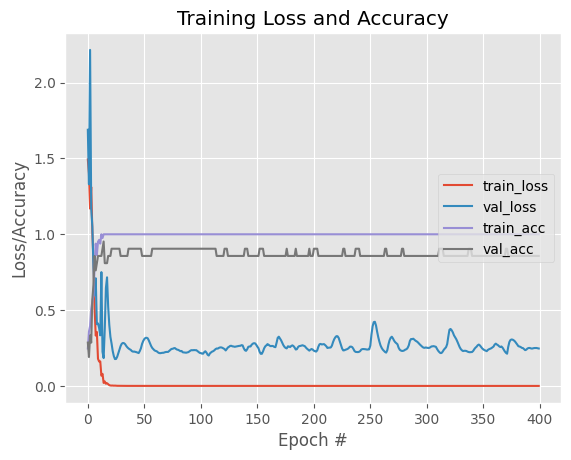

In [ ]:
# plot the training loss and accuracy
N = 400
plt.style.use("ggplot")
#history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

